## Import Libraries & Read Data

In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection

df = pd.read_csv('videos.csv')

## First Look At Data

In [2]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    500 non-null    int64 
 1   videoId       500 non-null    object
 2   publishedAt   500 non-null    object
 3   title         500 non-null    object
 4   tags          500 non-null    object
 5   duration      500 non-null    object
 6   viewCount     500 non-null    int64 
 7   likeCount     500 non-null    int64 
 8   commentCount  500 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 35.3+ KB
None


,Unnamed: 0,videoId,publishedAt,title,tags,duration,viewCount,likeCount,commentCount
0,0,20_wpq65YB4,2023-06-29T15:01:15Z,James Maddison MASTERCLASS vs Nottingham Fores...,"['James Maddison', 'Maddison', 'masterclass', ...",PT6M2S,27837,949,70
1,1,2nimbJKUqAE,2023-06-29T09:31:36Z,Eberechi Eze with a SENSATIONAL solo goal!,"['Eberechi Eze', 'Eze', 'solo goal', 'solo goa...",PT12S,197633,7495,49
2,2,x3juwrll0n8,2023-06-28T20:04:48Z,James Maddison first time finish vs Spurs,"['James Maddison', 'Maddison', 'Spurs', 'Totte...",PT28S,887069,30172,79
3,3,7O3FzXkm0UY,2023-06-28T19:09:21Z,Arsenal GK denies Kai Havertz ❗️ #shorts,"['Arsenal', 'Kai Havertz', 'Chelsea', 'Havertz...",PT24S,537480,16988,134
4,4,Cj78dlDLgdE,2023-06-28T17:19:57Z,STUNNING Edouard Mendy save! #shorts,"['Edouard Mendy', 'Edouard Mendy save', 'Edoua...",PT8S,202941,7143,40


## Data Cleaning

In [3]:
df = df.drop(['Unnamed: 0'], axis=1) #drop unncessary columns

df['publishedAt'] = pd.to_datetime(df['publishedAt'], format='%Y-%m-%dT%H:%M:%SZ') #modify date data type

df['tags'] = df['tags'].str.strip('[]').str.strip("''").str.split("', '") #modify tags column data type

hours = pd.to_numeric(df['duration'].str.extract('(\d+H)').squeeze().str[:-1].fillna(0))
mins = pd.to_numeric(df['duration'].str.extract('(\d+M)').squeeze().str[:-1].fillna(0))
seconds = pd.to_numeric(df['duration'].str.extract('(\d+S)').squeeze().str[:-1].fillna(0))
df['duration'] = hours * 3600 + mins * 60 + seconds #modify duartion to seconds

#Feature Engineering
df['likeRatio'] = df['likeCount'] / df['viewCount']
df['commentRatio'] = df['commentCount'] / df['viewCount']

df['tagCount'] = df['tags'].str.len()
df['titleLength'] = df['title'].str.len()

df = df.drop(columns=['likeCount', 'commentCount'], axis=1)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   videoId       500 non-null    object        
 1   publishedAt   500 non-null    datetime64[ns]
 2   title         500 non-null    object        
 3   tags          500 non-null    object        
 4   duration      500 non-null    int64         
 5   viewCount     500 non-null    int64         
 6   likeRatio     500 non-null    float64       
 7   commentRatio  500 non-null    float64       
 8   tagCount      500 non-null    int64         
 9   titleLength   500 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 39.2+ KB
None


,videoId,publishedAt,title,tags,duration,viewCount,likeRatio,commentRatio,tagCount,titleLength
0,20_wpq65YB4,2023-06-29 15:01:15,James Maddison MASTERCLASS vs Nottingham Fores...,"[James Maddison, Maddison, masterclass, Totten...",362,27837,0.034091,0.002515,31,64
1,2nimbJKUqAE,2023-06-29 09:31:36,Eberechi Eze with a SENSATIONAL solo goal!,"[Eberechi Eze, Eze, solo goal, solo goal footb...",12,197633,0.037924,0.000248,33,42
2,x3juwrll0n8,2023-06-28 20:04:48,James Maddison first time finish vs Spurs,"[James Maddison, Maddison, Spurs, Tottenham, T...",28,887069,0.034013,0.000089,33,41
3,7O3FzXkm0UY,2023-06-28 19:09:21,Arsenal GK denies Kai Havertz ❗️ #shorts,"[Arsenal, Kai Havertz, Chelsea, Havertz, Kai H...",24,537480,0.031607,0.000249,38,40
4,Cj78dlDLgdE,2023-06-28 17:19:57,STUNNING Edouard Mendy save! #shorts,"[Edouard Mendy, Edouard Mendy save, Edouard Me...",8,202941,0.035197,0.000197,38,36


## Splitting Data

In [4]:
X = df.drop(columns=['likeRatio'], axis=1)
y = df['likeRatio']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

## EDA

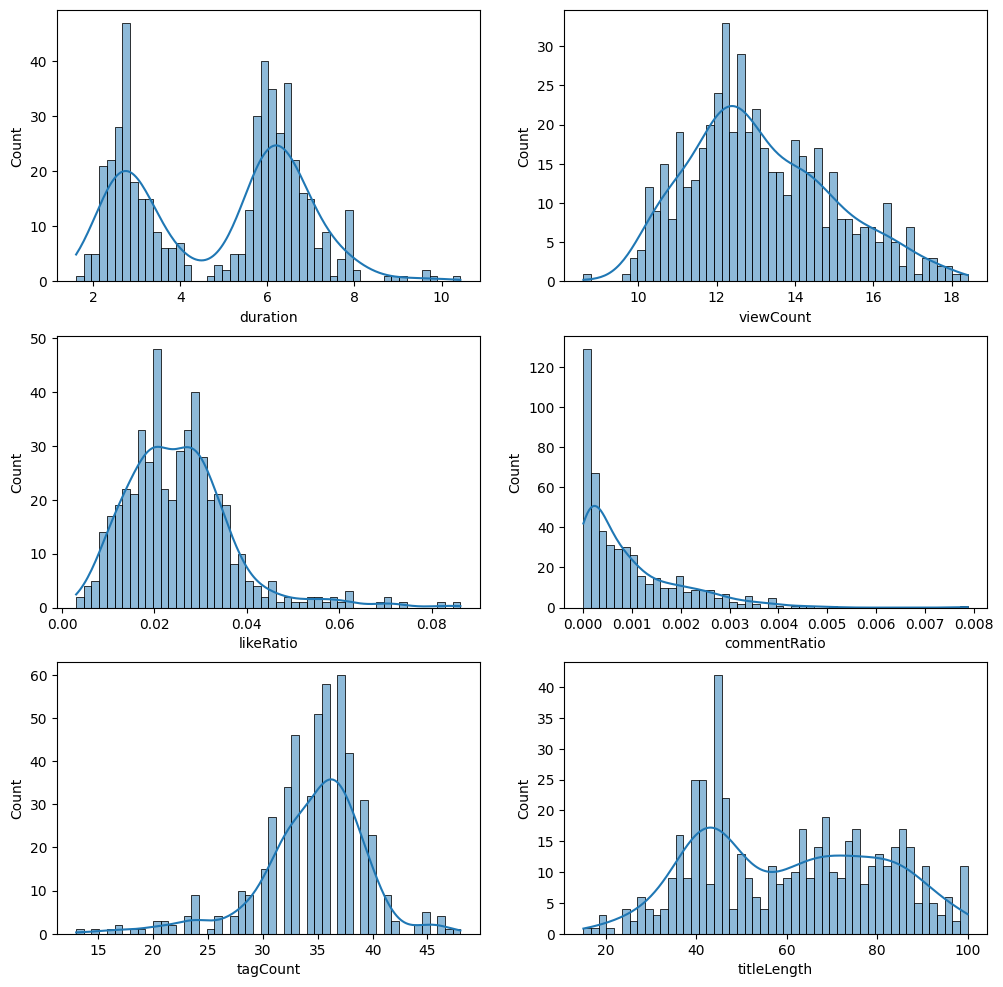

In [5]:
plt.figure(figsize = (12, 12))

plt.subplot(321)
sns.histplot(np.log(df['duration'] + 1), kde=True, bins = 50)

plt.subplot(322)
sns.histplot(np.log(df['viewCount'] + 1), kde=True, bins = 50)

plt.subplot(323)
sns.histplot(df['likeRatio'], kde=True, bins = 50)

plt.subplot(324)
sns.histplot(df['commentRatio'], kde=True, bins = 50)

plt.subplot(325)
sns.histplot(df['tagCount'], kde=True, bins = 50)

plt.subplot(326)
sns.histplot(df['titleLength'], kde=True, bins = 50)

plt.show()

[]

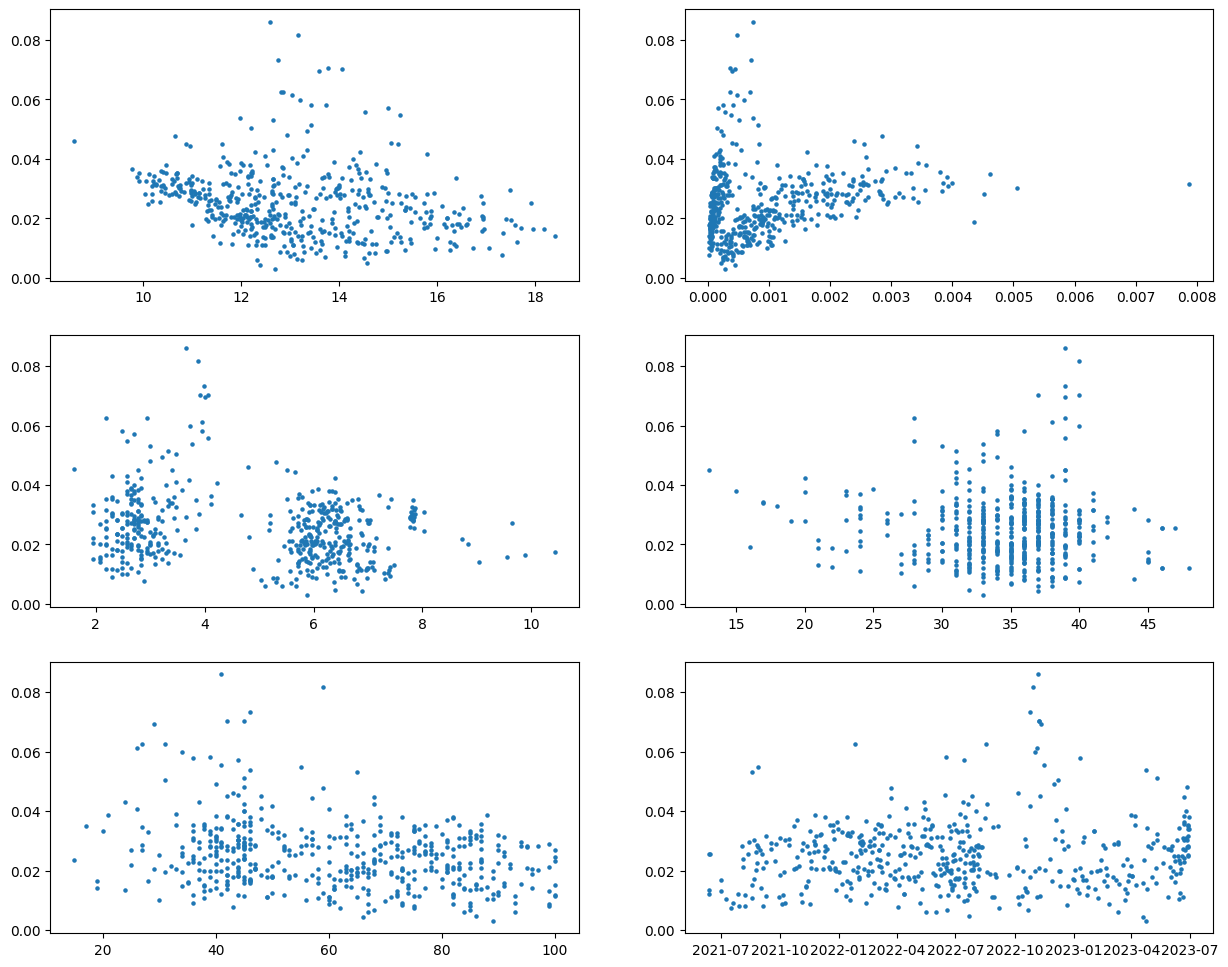

In [6]:
plt.figure(figsize = (15, 12))

plt.subplot(321)
plt.scatter(np.log(df['viewCount'] + 1), df['likeRatio'], s=5)

plt.subplot(322)
plt.scatter(df['commentRatio'], df['likeRatio'], s=5)

plt.subplot(323)
plt.scatter(np.log(df['duration'] + 1), df['likeRatio'], s=5)

plt.subplot(324)
plt.scatter(df['tagCount'], df['likeRatio'], s=5)

plt.subplot(325)
plt.scatter(df['titleLength'], df['likeRatio'], s=5)

plt.subplot(326)
plt.scatter(df['publishedAt'], df['likeRatio'], s=5)

plt.plot()

In [7]:
df2 = pd.DataFrame(df['tags'].explode().unique(), columns=['tag'])

df2['likeRatio'] = [np.mean(df['likeRatio'][df['tags'].str.contains(i, regex=False)]) for i in df2['tag']]
df2['freq'] = [np.sum(df['tags'].str.contains(i, regex=False)) for i in df2['tag']]

df2 = df2[df2['freq'] > 10]

In [8]:
df2.sort_values(by=['likeRatio'], ascending=False).head(n=20)

,tag,likeRatio,freq
801,FIFA 23,0.062357,11
516,pass,0.037152,12
109,Haaland,0.036982,11
105,Erling Haaland,0.035578,12
800,FIFA,0.035561,47
929,Christian Eriksen,0.035436,11
751,Fernandes,0.033965,15
1350,Trent Alexander-Arnold,0.033643,19
517,passes,0.033434,12
47,TikTok,0.031212,145


In [9]:
df2.sort_values(by=['freq'], ascending=False).head(n=20)

,tag,likeRatio,freq
15,Premier League,0.025210,458
16,epl,0.025411,450
17,Premier League goals,0.025412,428
27,football,0.025763,420
28,soccer,0.025724,418
19,epl goals,0.025650,416
18,Premier League highlights,0.025782,415
20,epl highlights,0.025965,411
104,PL,0.023791,227
98,Liverpool,0.023666,213


## Modeling

In [10]:
X_train = X_train.drop(columns=['videoId', 'publishedAt', 'title', 'tags'], axis=1)

X_train

,duration,viewCount,commentRatio,tagCount,titleLength
249,27,3190234,0.000086,34,45
433,190,592526,0.000383,38,67
19,245,53404,0.002547,13,68
322,15,127002,0.000197,32,40
332,17,1460654,0.000076,35,37
...,...,...,...,...,...
106,19,49590123,0.000036,34,46
270,163,563260,0.000249,38,93
348,7,517358,0.000058,45,19
435,416,322815,0.000753,39,46


In [11]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

In [12]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [13]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [14]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0103 (0.0021)

ElasticNet score: 0.0103 (0.0021)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model

Kernel Ridge score: 0.0285 (0.0020)

Gradient Boosting score: 0.0080 (0.0008)

[18:56:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[18:56:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[18:56:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[18:56:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[18:56:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

Xgboost score: 0.0120 (0.0